In [1]:
import numpy as np
import pandas as pd

# datetime utilities
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
import seaborn as sns

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

import acquire as get

Using your store items data:

1. Convert date column to datetime format.
2. Plot the distribution of sale_amount and item_price.
3. Set the index to be the datetime variable.
4. Add a 'month' and 'day of week' column to your dataframe.
5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [2]:
df = get.get_store_item_demand_data()

Using cached CSV


In [3]:
# 1. Convert date column to datetime format.
df.sale_date = pd.to_datetime(df.sale_date)

In [4]:
# That took about two minutes to run. Let's see the dtypes again.
df.dtypes

sale_id                        int64
store_id                       int64
item_id                        int64
item_brand                    object
item_name                     object
item_price                   float64
sale_amount                  float64
sale_date        datetime64[ns, UTC]
store_address                 object
store_city                    object
store_state                   object
store_zipcode                  int64
item_upc12                     int64
item_upc14                     int64
dtype: object

array([[<AxesSubplot:title={'center':'item_price'}>,
        <AxesSubplot:title={'center':'sale_amount'}>]], dtype=object)

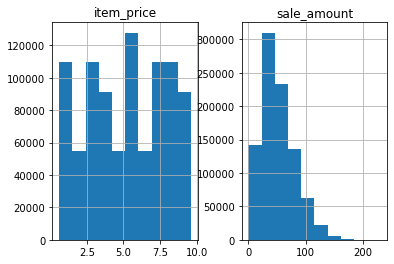

In [6]:
# 2. Plot the distribution of sale_amount and item_price.
df[['item_price', 'sale_amount']].hist()
# sale amount will have an outlier. 

<AxesSubplot:xlabel='item_price'>

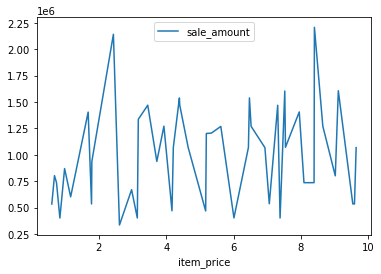

In [7]:
by_date = df.groupby(['item_price']).sale_amount.sum().reset_index()
by_date.plot(x='item_price', y='sale_amount')

<AxesSubplot:xlabel='sale_amount'>

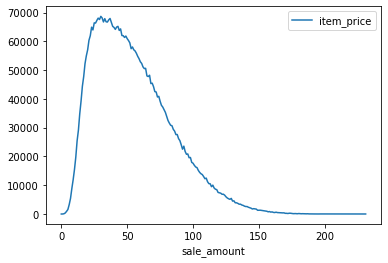

In [8]:
by_date = df.groupby(['sale_amount']).item_price.sum().reset_index()
by_date.plot(y='item_price', x='sale_amount')

In [11]:
# 3. Set the index to be the datetime variable.
df = df.set_index('sale_date').sort_index()

In [ ]:
df.head()

In [16]:
# 4. Add a 'month' and 'day of week' column to your dataframe.
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [17]:
df

,sale_id,store_id,item_id,item_brand,item_name,item_price,sale_amount,store_address,store_city,store_state,store_zipcode,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,1,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,35200264013,35200264013,January,Tuesday
2013-01-01 00:00:00+00:00,211817,7,12,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,26.0,12018 Perrin Beitel Rd,San Antonio,TX,78217,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,832657,7,46,Mama Marys,Pizza Sauce,4.65,27.0,12018 Perrin Beitel Rd,San Antonio,TX,78217,35457770664,35457770664,January,Tuesday
2013-01-01 00:00:00+00:00,213643,8,12,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,54.0,15000 San Pedro Ave,San Antonio,TX,78232,74676640211,74676640211,January,Tuesday
2013-01-01 00:00:00+00:00,215469,9,12,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,35.0,735 SW Military Dr,San Antonio,TX,78221,74676640211,74676640211,January,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,619014,9,34,Halls,Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct,4.17,21.0,735 SW Military Dr,San Antonio,TX,78221,312546628694,312546628694,December,Sunday
2017-12-31 00:00:00+00:00,620840,10,34,Halls,Halls Menthol Cough Suppresant/oral Anesthetic Drops Honey-lemon - 30 Ct,4.17,32.0,8503 NW Military Hwy,San Antonio,TX,78231,312546628694,312546628694,December,Sunday
2017-12-31 00:00:00+00:00,622666,1,35,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,55.0,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,33674100066,33674100066,December,Sunday


In [18]:
# 5. Add a column to your dataframe, sales_total, which is a derived from
#    sale_amount (total items) and item_price.
#.   Do I also need to include the San Antonio tax-rate?
df['sales_total'] = df.sale_amount * df.item_price

In [ ]:
# 6. Make sure all the work that you have done above is reproducible.
#    That is, you should put the code above into separate functions and
#    be able to re-run the functions and get the same results.

# Check mark. 

Using the OPS data acquired in the Acquire exercises opsd_germany_daily.csv, complete the following:

7. Convert date column to datetime format.
8. Plot the distribution of each of your variables.
9. Set the index to be the datetime variable.
10. Add a month and a year column to your dataframe.
11. Fill any missing values.
12. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [19]:
df2 = get.get_opsd_data()

In [20]:
df2

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [21]:
# 7. Convert date column to datetime format.
df2.Date = pd. to_datetime(df2.Date)
# easy, breezy, beautiful: Covergirl

<AxesSubplot:title={'center':'Solar'}, xlabel='Date'>

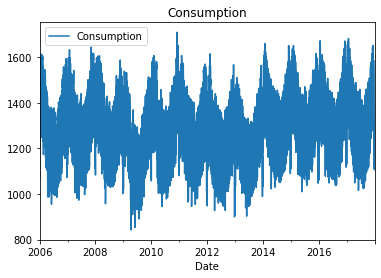

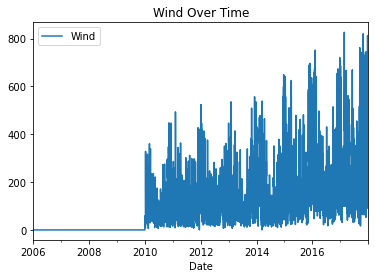

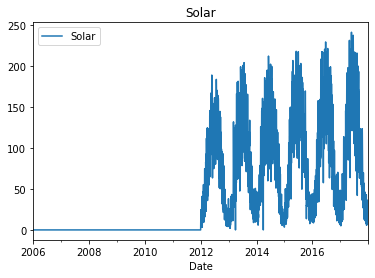

In [26]:
# 8. Plot the distribution of each of your variables.
by_date = df2.groupby('Date').Consumption.sum().reset_index()
by_date.plot(x='Date', y='Consumption', title='Consumption')

by_date = df2.groupby('Date').Wind.sum().reset_index()
by_date.plot(x='Date', y='Wind', title='Wind Over Time')
#lol, 2006-2010..the half-decade of windlessness, I remember it all too well. 

by_date = df2.groupby('Date').Solar.sum().reset_index()
by_date.plot(x='Date', y='Solar', title='Solar')

In [27]:
# 9. Set the index to be the datetime variable.

df2 = df2.set_index('Date').sort_index()

In [28]:
# 10. Add a month and a year column to your dataframe.
df2['month'] = df2.index.month
df2['year'] = df2.index.year

In [30]:
# 11. Fill any missing values.
df2.isnull().sum().sum()
# 5854 total
df2.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [33]:
df2 = df2.fillna('0')
# probably a better way to do it, buttt MVP. 

In [ ]:
# 12. Make sure all the work that you have done above is reproducible. That is, you should put
# the code above into separate functions and be able to re-run the functions and get the same results.